<a href="https://colab.research.google.com/github/emmad225/DataScienceCoursework/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nest-asyncio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nest_asyncio
nest_asyncio.apply()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import stan
import math
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from google.colab import files
uploaded = files.upload()
import pandas as pd
import io

Saving huffpost.csv to huffpost.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['huffpost.csv']))
dfcount=df.groupby(['category']).size().reset_index(name='count').sort_values(['count'], ascending=False)

print(dfcount.sum())
print(dfcount)
print(df.head)


          category  count
15        POLITICS   2863
23       U.S. NEWS   1366
6    ENTERTAINMENT   1304
28      WORLD NEWS   1110
2           COMEDY    225
19          SPORTS    193
20  STYLE & BEAUTY    165
3            CRIME    157
12           MEDIA    129
9    HOME & LIVING    125
7      ENVIRONMENT    121
26        WELLNESS    118
14       PARENTING    114
8     FOOD & DRINK    114
25      WEIRD NEWS    107
27           WOMEN     82
1         BUSINESS     55
0     BLACK VOICES     55
13           MONEY     49
4   CULTURE & ARTS     44
16    QUEER VOICES     33
18         SCIENCE     28
10          IMPACT     25
21            TECH     22
17        RELIGION     21
22          TRAVEL     13
5        EDUCATION     10
24        WEDDINGS      2
11   LATINO VOICES      1
<bound method NDFrame.head of                                                    link  \
0     https://www.huffpost.com/entry/covid-boosters-...   
1     https://www.huffpost.com/entry/american-airlin...   
2     https:/

In [ ]:
df['short_description']=df['short_description'].str.replace('\n','')
df['short_description']=df['short_description'].str.replace(',','')
df['short_description']=df['short_description'].str.replace('.','')
df['short_description']=df['short_description'].str.replace('?','')
df['word']=df['short_description'].str.split(" ")

df_long=df.explode(['word']).reset_index()
df_long["word"]=df_long["word"].str.lower()

print(df_long.head)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


<bound method NDFrame.head of         index                                               link  \
0           0  https://www.huffpost.com/entry/covid-boosters-...   
1           0  https://www.huffpost.com/entry/covid-boosters-...   
2           0  https://www.huffpost.com/entry/covid-boosters-...   
3           0  https://www.huffpost.com/entry/covid-boosters-...   
4           0  https://www.huffpost.com/entry/covid-boosters-...   
...       ...                                                ...   
158254   8650  https://www.huffpost.com/entry/sesame-street-l...   
158255   8650  https://www.huffpost.com/entry/sesame-street-l...   
158256   8650  https://www.huffpost.com/entry/sesame-street-l...   
158257   8650  https://www.huffpost.com/entry/sesame-street-l...   
158258   8650  https://www.huffpost.com/entry/sesame-street-l...   

                                                 headline   category  \
0       Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1       O

In [ ]:
dfcount=df_long.groupby(['category', 'word']).size().reset_index(name='count').sort_values(['count'], ascending=False)
print(dfcount.head(10))


            category word  count
25678       POLITICS  the   3819
10393  ENTERTAINMENT  the   1812
37174      U.S. NEWS  the   1710
45409     WORLD NEWS  the   1541
25796       POLITICS   to   1485
17517       POLITICS    a   1286
23144       POLITICS   of   1141
21545       POLITICS   in    881
17835       POLITICS  and    838
31385      U.S. NEWS    a    732


In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df_no_stop = df_long[~df_long.word.isin(stopwords.words('english'))]
dfcount=df_no_stop.groupby(['short_description','word']).size().reset_index(name='count').sort_values(['count'], ascending=False)
print(dfcount.head(10))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                       short_description       word  count
6506   "Wall wall wall wall wall – is that all all al...       wall      4
86136       There is always a tweet Always always always     always      4
83354  The streaming service announced the movies and...       soon      3
40559  New Jersey has been reporting about 647 new ca...        new      3
96984  “The first thing that comes to mind man is all...      we’re      3
30126  Home because of the coronavirus Use these expe...       hair      3
67212  The best face masks for dry skin pores acne oi...       skin      3
32575  Introducing a new HuffPost series on the pop c...  something      3
83355  The streaming service announced the movies and...  streaming      3
83353  The streaming service announced the movies and...      shows      3


Up to this point-- the most common words by categrogy of article have been found without stop words!

In [ ]:
from textblob import TextBlob
print(TextBlob(df['short_description'][0]).sentiment)


Sentiment(polarity=0.11818181818181818, subjectivity=0.37727272727272726)



*   Polarity = more positive sentiments
*   Subjectivity = little less than half subjective

In [ ]:
df['sentiment']=df['short_description'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment[0]))
print(df.groupby('category').mean('sentiment'))

                sentiment
category                 
BLACK VOICES     0.055809
BUSINESS         0.088480
COMEDY          -0.022824
CRIME           -0.036736
CULTURE & ARTS   0.122553
EDUCATION        0.173523
ENTERTAINMENT    0.078001
ENVIRONMENT      0.060677
FOOD & DRINK     0.144128
HOME & LIVING    0.173589
IMPACT           0.078644
LATINO VOICES   -0.550000
MEDIA            0.041005
MONEY            0.100184
PARENTING        0.107821
POLITICS         0.037889
QUEER VOICES     0.097353
RELIGION         0.051284
SCIENCE          0.129445
SPORTS           0.074477
STYLE & BEAUTY   0.135574
TECH             0.048058
TRAVEL           0.147436
U.S. NEWS        0.030667
WEDDINGS         0.040000
WEIRD NEWS       0.000291
WELLNESS         0.082305
WOMEN            0.085836
WORLD NEWS       0.029958


The average sentiment of the U.S. NEWS category is 0.030667 whereas the sentiment of the ENTERTAINMENT category is  0.078001. The sentiment function helps to recognize mood and emotions within a text, and assigns a value depenedent where it falls on the scale of polarity and subjectivity [-1, 1] respectively. Both U.S. NEWS  and ENTERTAINMENT averages are positive values over 0.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
df_small = df[df.category.isin(["U.S. NEWS", "ENTERTAINMENT"])]
vectorizer = TfidfVectorizer(
              sublinear_tf = True, max_df=0.8, min_df=5, max_features=500, stop_words="english")
Xfeatures = vectorizer.fit_transform(df_small.short_description)
feature_names = vectorizer.get_feature_names_out()
print(feature_names)

['10' '100' '11' '17' '18' '19' '20' '2017' '2019' '2020' '21' '22' '23'
 '35' 'abuse' 'academy' 'according' 'accused' 'action' 'activist' 'actor'
 'actors' 'actress' 'administration' 'age' 'ago' 'air' 'album'
 'allegations' 'allegedly' 'america' 'american' 'americans' 'amid'
 'anchor' 'andrew' 'angeles' 'announced' 'anti' 'appearance' 'appeared'
 'area' 'arrested' 'artist' 'asked' 'assault' 'attack' 'attorney' 'author'
 'authorities' 'award' 'awards' 'away' 'baby' 'beach' 'believe' 'best'
 'biden' 'big' 'black' 'board' 'book' 'border' 'british' 'brought'
 'business' 'california' 'called' 'came' 'care' 'case' 'cases' 'cast'
 'cause' 'center' 'central' 'ceremony' 'change' 'character' 'charged'
 'charges' 'child' 'children' 'chris' 'city' 'claim' 'claimed' 'claims'
 'coach' 'college' 'comedian' 'comedy' 'comes' 'coming' 'community'
 'company' 'confirmed' 'coronavirus' 'country' 'county' 'couple' 'court'
 'covid' 'crash' 'creator' 'crew' 'criminal' 'crisis' 'crowd' 'currently'
 'daily' 'd

Subset of keywords from U.S. NEWS and ENTERTAINMENT categories.

0.8015873015873016


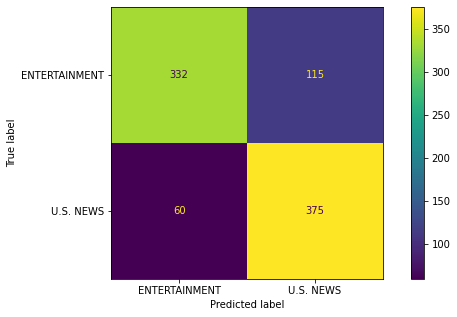

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xfeatures, df_small['category'], test_size=0.33, random_state=42)
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier(tol=1e-2, solver = "sparse_cg")
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
fig,ax = plt.subplots(figsize=(10,5))
ConfusionMatrixDisplay.from_predictions(y_test, pred, ax=ax)
print(accuracy_score(y_test,pred))

In [ ]:
average_feature_effects = clf.coef_ * np.asarray(X_train.mean(axis=0)).ravel()
print((average_feature_effects).shape)
top5_coeff = np.argsort(average_feature_effects[0])[-5:][::-1]
first5_coeff = np.argsort(average_feature_effects[0])[:5][::-1]
top5_word = np.argsort(feature_names)[-5:][::-1]
print(top5_coeff)
print(first5_coeff)
print(clf.coef_[0][top5_coeff])
print(clf.coef_[0][first5_coeff])
print(feature_names[top5_coeff])
print(feature_names[first5_coeff])

(1, 500)
[381 336 326 418 487]
[160 204 405 415  20]
[0.2658984  0.72833507 0.5168561  0.80519106 0.85866393]
[-1.38685565 -0.98917134 -1.37540907 -1.26335097 -1.65811039]
['said' 'police' 'people' 'state' 'woman']
['film' 'host' 'singer' 'star' 'actor']


The words that correlate to the largest coefficients are in the U.S. NEWS category are ['said' 'police' 'people' 'state' 'woman'], whereas in the ENTERTAINMENT category, the most are ['film' 'host' 'singer' 'star' 'actor']. Among these two subsets, 'woman' has the highest cofefficient, as does 'actor' in U.S. NEWS and ENTERTAINMENT respectively.

This evaluation helps us to overall see the most common words featured in different Huffington Post new articles among various categoories. We used the data to find the most common words by category. We then shrunk the data to focus specifially on U.S. NEWS and ENTERTAINMENT categories. It was interesting to find they had fairly similar values of sentiment (polarity and subjectivity) as one category is supposed to be a reliable source for news, and the other is meant to provide entertainment, gossip, and drama. Lastly, we used the data and a regression model to find the words with the largest coefficents in the data and how our Predicted Label correlates to the true data. While the predicted data is seem as being on total opposite sides of the spectrum, their colors were much opposite. The same held true for the True Label.  